## United States Companies Bankrupcy Prediction Project

In [1145]:
import pandas as pd
import matplotlib.pyplot as plt 

In [1146]:
df=pd.read_csv('american_bankruptcy.csv')

In [1147]:
df

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [1148]:
len(df)

78682

In [1149]:
# checking for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
78677    False
78678    False
78679    False
78680    False
78681    False
Length: 78682, dtype: bool

# Renaming the columns 

In [1150]:
df.rename(columns={'X1':'current assets','X2':'Cost of goods sold','X3':'loss of value','X4':'Earnings before interest','X5':'Inventory','X6': 'Net Income','X7':'Total Recievables','X8':'Market Value','X9':'Net Sales','X10':'Total assets','X11':'Total Long term debt','X12':'Earnings before interest and taxes','X13':'Gross Profit','X14':'Total Current Liabilities','X15':'Retail Earnings','X16':'Total Revenue','X17':'Total Liabilities','X18':'Total Operating Expenses'}, inplace=True)

In [1151]:
df

,company_name,status_label,year,current assets,Cost of goods sold,loss of value,Earnings before interest,Inventory,Net Income,Total Recievables,...,Net Sales,Total assets,Total Long term debt,Earnings before interest and taxes,Gross Profit,Total Current Liabilities,Retail Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [1152]:
df.describe()

,year,current assets,Cost of goods sold,loss of value,Earnings before interest,Inventory,Net Income,Total Recievables,Market Value,Net Sales,Total assets,Total Long term debt,Earnings before interest and taxes,Gross Profit,Total Current Liabilities,Retail Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


In [1153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   company_name                        78682 non-null  object 
 1   status_label                        78682 non-null  object 
 2   year                                78682 non-null  int64  
 3   current assets                      78682 non-null  float64
 4   Cost of goods sold                  78682 non-null  float64
 5   loss of value                       78682 non-null  float64
 6   Earnings before interest            78682 non-null  float64
 7   Inventory                           78682 non-null  float64
 8   Net Income                          78682 non-null  float64
 9   Total Recievables                   78682 non-null  float64
 10  Market Value                        78682 non-null  float64
 11  Net Sales                           78682

In [1154]:
df.isnull()

,company_name,status_label,year,current assets,Cost of goods sold,loss of value,Earnings before interest,Inventory,Net Income,Total Recievables,...,Net Sales,Total assets,Total Long term debt,Earnings before interest and taxes,Gross Profit,Total Current Liabilities,Retail Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
78678,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
78679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
78680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Correlation Matrix

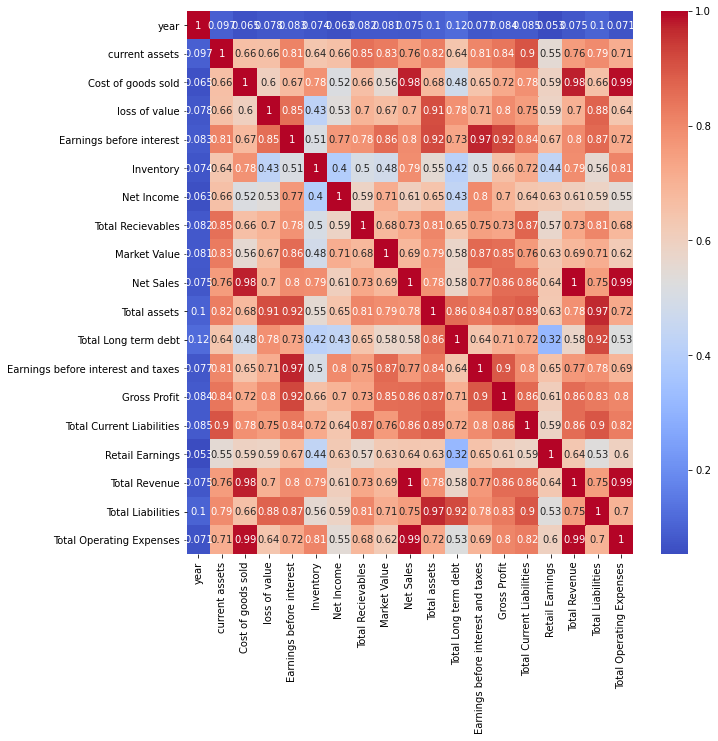

In [1155]:
import seaborn as sns 
# find correlation
corr_matrix= df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.show()

# We are going need to drop some  values

In [1158]:
df.drop(['year','current assets','Inventory','Net Income','Cost of goods sold'],axis=1,inplace=True)

In [1159]:
df

,company_name,status_label,loss of value,Earnings before interest,Total Recievables,Market Value,Net Sales,Total assets,Total Long term debt,Earnings before interest and taxes,Gross Profit,Total Current Liabilities,Retail Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
0,C_1,alive,18.373,89.031,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,18.577,64.367,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,22.496,27.207,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,27.172,30.745,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,26.680,47.491,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,14.094,45.615,22.846,756.4827,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,42.592,202.133,54.611,527.5750,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,65.057,79.051,42.467,578.8868,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,65.330,69.171,27.217,412.6241,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [1160]:
X=df[['Gross Profit','Earnings before interest and taxes','Total assets','Total Long term debt','Market Value','loss of value']]
y=df['status_label']

In [1161]:
X

,Gross Profit,Earnings before interest and taxes,Total assets,Total Long term debt,Market Value,loss of value
0,191.226,70.658,740.998,180.447,372.7519,18.373
1,160.444,45.790,701.854,179.987,377.1180,18.577
2,112.244,4.711,710.199,217.699,364.5928,22.496
3,109.590,3.573,686.621,164.658,143.3295,27.172
4,128.656,20.811,709.292,248.666,308.9071,26.680
...,...,...,...,...,...,...
78677,60.885,31.521,1099.101,184.666,756.4827,14.094
78678,231.969,159.541,1865.926,770.103,527.5750,42.592
78679,100.784,13.994,1746.235,683.985,578.8868,65.057
78680,95.357,3.841,1736.110,694.035,412.6241,65.330


In [1162]:
y

0        alive
1        alive
2        alive
3        alive
4        alive
         ...  
78677    alive
78678    alive
78679    alive
78680    alive
78681    alive
Name: status_label, Length: 78682, dtype: object

In [1163]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [1164]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
predict=lr.predict(X_test)
print("Prediction:",lr.score(X_test, y_test))

Prediction: 0.9326927965024655


# Confusion Matrix 

In [1165]:
from sklearn.metrics import confusion_matrix

In [1166]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted:Yes','Predicted:No'],index=['Actual Yes','Actual No'])

,Predicted:Yes,Predicted:No
Actual Yes,18345,3
Actual No,1321,2


# Classification Report

In [1167]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

       alive       0.93      1.00      0.97     18348
      failed       0.40      0.00      0.00      1323

    accuracy                           0.93     19671
   macro avg       0.67      0.50      0.48     19671
weighted avg       0.90      0.93      0.90     19671

